# 探索式資料分析

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
#載入檔案
pima = pd.read_csv('./data/pima.data.csv')
pima.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


#### 資料處理 - 加入title

In [3]:
#資料並沒有每行的title
#加入title

pima_column_names = ['times_pregnant', 'plasma_glucose_concentration', 'diastolic_blood_pressure', 'triceps_thickness', 'serum_insulin', 'bmi', 'pedigree_function', 'age', 'onset_diabetes']
pima = pd.read_csv('./data/pima.data.csv', names=pima_column_names)
pima.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### 觀察null accuracy

In [4]:
#onset_diabetes:是否有糖尿病
#null accuracy:模型總是預測頻率較高的類別時達到的正確率

pima['onset_diabetes'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: onset_diabetes, dtype: float64

> 在此資料集有65%左右的資料屬於「健康人」，約35%是屬於「糖尿病患者」。模型只要大部分都猜「健康人」，就可以獲得65%正確率，為null accuracy

#### 根據目標，繪製不同特徵的直方圖

直方圖參數:https://kknews.cc/zh-tw/code/3ngaz5a.html

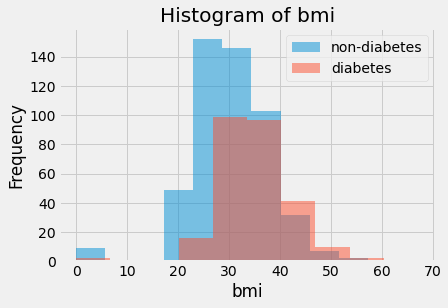

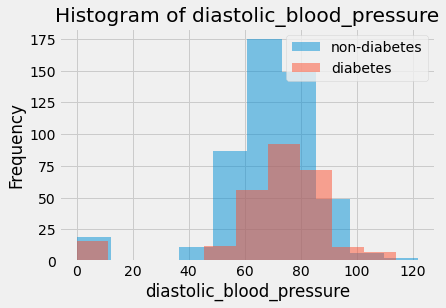

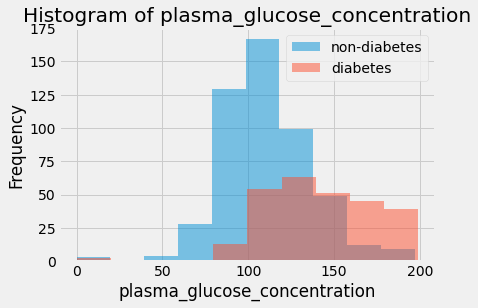

In [5]:
#bmi:身體質量指數
#diastolic_blood_pressure:舒張壓
#plasma_glucose_concentration:血漿葡萄糖濃度

for col in ['bmi', 'diastolic_blood_pressure', 'plasma_glucose_concentration']:
    plt.hist(pima[pima['onset_diabetes']==0][col], 10, alpha=0.5, label="non-diabetes")
    plt.hist(pima[pima['onset_diabetes']==1][col], 10, alpha=0.5, label="diabetes")

    plt.legend(loc='upper right')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title('Histogram of {}'.format(col))
    plt.show()

由直方圖觀察，plasma_glucose_concentration對於有無糖尿病有較明顯的落差。可以進一步的觀察相關性的數值

### 相關分析

<AxesSubplot:>

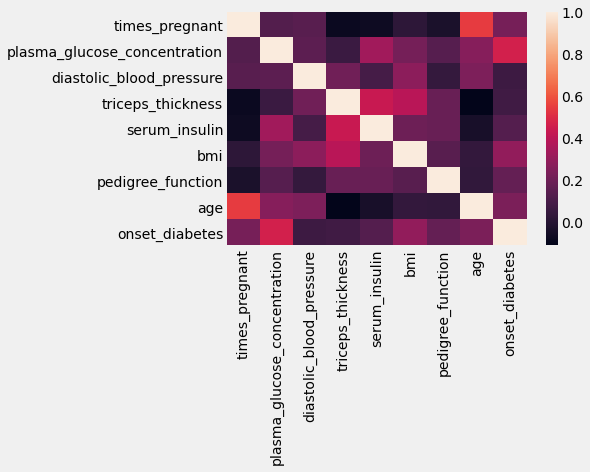

In [6]:
#前圖觀察，對於有罹患糖尿病的患者，「血漿葡萄糖濃度」會增長許多
#利用「線性相關矩陣」(linear correlation matrix)量化變數之間的關係
#繪製相關矩陣熱區圖(heatmap)

sns.heatmap(pima.corr())

In [7]:
#由上圖示，plasma_glucose_concentration與onset_diabetes有很強的相關性
#顯示相關數值
pima.corr()['onset_diabetes']

times_pregnant                  0.221898
plasma_glucose_concentration    0.466581
diastolic_blood_pressure        0.065068
triceps_thickness               0.074752
serum_insulin                   0.130548
bmi                             0.292695
pedigree_function               0.173844
age                             0.238356
onset_diabetes                  1.000000
Name: onset_diabetes, dtype: float64

plasma_glucose_concentration與onset_diabetes的相關性最高。plasma_glucose_concentration是重要的「變數」

# 遺漏值
此處所處裡的遺漏值都是屬於metric尺度的特徵，都可以做平均或是中位數運算

## 1.遺漏值觀察
觀察遺漏值的情形

In [8]:
#觀察有無遺漏值
pima.isnull().sum()

times_pregnant                  0
plasma_glucose_concentration    0
diastolic_blood_pressure        0
triceps_thickness               0
serum_insulin                   0
bmi                             0
pedigree_function               0
age                             0
onset_diabetes                  0
dtype: int64

In [9]:
#觀察資料數量
pima.shape

(768, 9)

In [10]:
#描述性統計
pima.describe()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 2.遺漏值轉換
> 將欄位遺漏值用0表示的欄位改用None替代

bmi的最小值為0，但不應該有0的出現。因此可能是利用0來表示遺漏值

以下欄位的最小值都為0。times_pregnant、plasma_glucose_concentration、diastolic_blood_pressure、triceps_thickness、serum_insulin、bmi、onset_diabetes

onset_diabetes=0代表沒有糖尿病，times_pregnant=0代表沒有懷過孕

其他的欄位是0表示為遺漏值，要將他轉換成None

In [11]:
columns = ['serum_insulin', 'bmi', 'plasma_glucose_concentration', 'diastolic_blood_pressure', 'triceps_thickness']

for col in columns:
    pima[col].replace([0], [None], inplace=True)

In [12]:
pima.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      5
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

In [13]:
pima.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6,148,72,35,None,33.6,0.627,50,1
1,1,85,66,29,None,26.6,0.351,31,0
2,8,183,64,None,None,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
#describe不會包含有遺漏值的行
pima.describe()

,times_pregnant,pedigree_function,age,onset_diabetes
count,768.000000,768.000000,768.000000,768.000000
mean,3.845052,0.471876,33.240885,0.348958
std,3.369578,0.331329,11.760232,0.476951
min,0.000000,0.078000,21.000000,0.000000
25%,1.000000,0.243750,24.000000,0.000000
50%,3.000000,0.372500,29.000000,0.000000
75%,6.000000,0.626250,41.000000,1.000000
max,17.000000,2.420000,81.000000,1.000000


## 3 遺漏值處理

### 遺漏值刪除法

In [15]:
#刪除存在遺漏值的列
pima_dropped = pima.dropna()

num_row_lost = round(100*(pima.shape[0] - pima_dropped.shape[0])/float(pima.shape[0]))
print("dropped {}% of rows".format(num_row_lost))

dropped 49% of rows


#### 遺漏值刪除「前」「後」分析

要觀察我們將資料做處理後是否真的有提升成效，因此每次都要比較處理前處理後的結果，看是否這樣的處理方式洽當

In [16]:
#刪除前的糖尿病患者分布
pima['onset_diabetes'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: onset_diabetes, dtype: float64

In [17]:
#刪除後的糖尿病患者分布
pima_dropped['onset_diabetes'].value_counts(normalize=True)

0    0.668367
1    0.331633
Name: onset_diabetes, dtype: float64

In [18]:
#刪除前的平均值(不包含遺漏值)
pima.mean()

times_pregnant                    3.845052
plasma_glucose_concentration    121.686763
diastolic_blood_pressure         72.405184
triceps_thickness                29.153420
serum_insulin                   155.548223
bmi                              32.457464
pedigree_function                 0.471876
age                              33.240885
onset_diabetes                    0.348958
dtype: float64

In [19]:
#刪除後的平均值
pima_dropped.mean()

times_pregnant                    3.301020
plasma_glucose_concentration    122.627551
diastolic_blood_pressure         70.663265
triceps_thickness                29.145408
serum_insulin                   156.056122
bmi                              33.086224
pedigree_function                 0.523046
age                              30.864796
onset_diabetes                    0.331633
dtype: float64

In [20]:
#平均值變化差異
(pima_dropped.mean() - pima.mean()) / pima.mean()

times_pregnant                 -0.141489
plasma_glucose_concentration    0.007731
diastolic_blood_pressure       -0.024058
triceps_thickness              -0.000275
serum_insulin                   0.003265
bmi                             0.019372
pedigree_function               0.108439
age                            -0.071481
onset_diabetes                 -0.049650
dtype: float64

Text(0, 0.5, '% change')

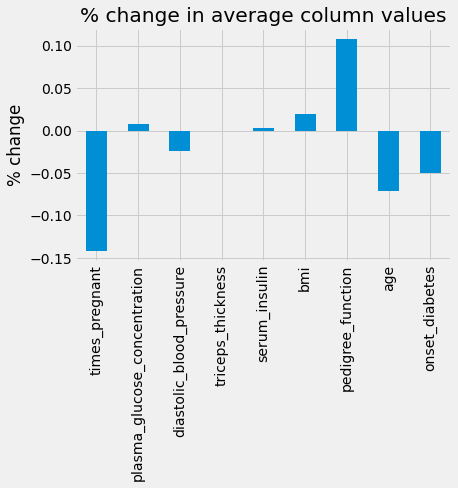

In [21]:
#視覺化平均值差異，用「長條圖」
ax = ((pima_dropped.mean() - pima.mean()) / pima.mean()).plot(kind='bar', title='% change in average column values')
ax.set_ylabel('% change')

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

- KNN(K Nearest Neighbor)

透過鄰近點來做分類，K是觀察最近的K個點作為分類依據，透過調整K可以得到不同的結果，多嘗試可以找到最佳解

- Grid Search

「網格搜尋」模組，會自動做交叉驗證，並且找出準確率最好的「KNN參數組合」(使用暴力搜尋，brute force)

#### 刪除遺漏值後的機器學習成效

In [23]:
#建立 X 與 y 特徵
X_dropped = pima_dropped.drop('onset_diabetes', axis=1)
print("learning from {} rows".format(X_dropped.shape[0]))
y_dropped = pima_dropped['onset_diabetes']

knn = KNeighborsClassifier()

#建立KNN模型參數
knn_params = {'n_neighbors':[1,2,3,4,5,6,7]}

grid = GridSearchCV(knn, knn_params)
grid.fit(X_dropped, y_dropped)

print(grid.best_score_, grid.best_params_)

learning from 392 rows
0.7348263550795197 {'n_neighbors': 7}


### 遺漏值填補法

In [24]:
#填補血漿行
#先觀察plasma_glucose_concentration行的遺漏值
pima.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      5
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

In [25]:
#觀察plasma_glucose_concentration的五個遺漏值
empty_plasma_index = pima[pima['plasma_glucose_concentration'].isnull()].index
pima.loc[empty_plasma_index]['plasma_glucose_concentration']

75     None
182    None
342    None
349    None
502    None
Name: plasma_glucose_concentration, dtype: object

#### 手動平均值填補

In [26]:
#利用平均值填補這些空缺
pima['plasma_glucose_concentration'].fillna(pima['plasma_glucose_concentration'].mean(), inplace=True)
pima.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      0
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

In [27]:
#檢查剛剛的空缺位置被什麼數值取代
pima.loc[empty_plasma_index]['plasma_glucose_concentration']

75     121.686763
182    121.686763
342    121.686763
349    121.686763
502    121.686763
Name: plasma_glucose_concentration, dtype: float64

### sklearn impute自動填補平均值

In [28]:
#可以使用sklearn的imputer填補
#strategy表示填補的方法
#impute的import方式跟之前有所不同
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

#其輸出值為Numpy的array
pima_imputed = imputer.fit_transform(pima)

#將其轉換為pandas dataframe
pima_imputed = pd.DataFrame(pima_imputed, columns=pima_column_names)

pima_imputed.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0


In [29]:
#觀察plasma_glucose_concentration的填補跟之前手動的方法是否相同
pima_imputed.loc[empty_plasma_index]['plasma_glucose_concentration']

75     121.686763
182    121.686763
342    121.686763
349    121.686763
502    121.686763
Name: plasma_glucose_concentration, dtype: float64

In [30]:
#檢查還有沒有遺漏值
pima_imputed.isnull().sum()

times_pregnant                  0
plasma_glucose_concentration    0
diastolic_blood_pressure        0
triceps_thickness               0
serum_insulin                   0
bmi                             0
pedigree_function               0
age                             0
onset_diabetes                  0
dtype: int64

## 機器學習管線(pipelines)

經過各種「預處理」到「學習演算法」，因為會經過各種步驟，可以讓pipeline幫我們自由做搭配，觀察哪個結果最好

> 適當的填補方法是資料分成「訓練資料」與「測試資料」，並且利用「訓練資料」的數值作為填補的依據，才不會有偷看「測試資料」的問題

### 平均值填補方法

In [31]:
#先切分再填補
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

knn_params = {'classify__n_neighbors':[1,2,3,4,5,6,7]}

knn = KNeighborsClassifier()

mean_imupte = Pipeline([('imputer', SimpleImputer(strategy='mean')), ('classify', knn)])

X = pima.drop('onset_diabetes', axis = 1)
y = pima['onset_diabetes']

grid = GridSearchCV(mean_imupte, knn_params)
grid.fit(X, y)

print(grid.best_score_, grid.best_params_)

0.7318394024276378 {'classify__n_neighbors': 7}


### 中位數填補方法

In [32]:
#先切分再填補
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

knn_params = {'classify__n_neighbors':[1,2,3,4,5,6,7]}

knn = KNeighborsClassifier()

mean_imupte = Pipeline([('imputer', SimpleImputer(strategy='median')), ('classify', knn)])

X = pima.drop('onset_diabetes', axis = 1)
y = pima['onset_diabetes']

grid = GridSearchCV(mean_imupte, knn_params)
grid.fit(X, y)

print(grid.best_score_, grid.best_params_)

0.7292589763177999 {'classify__n_neighbors': 7}


# 標準化與常態化

往往不同特徵之間的「尺度」會有所不同，例如「diastolic_blood_pressure」舒張壓數值在24-122之間，但年齡介在21-81之間。演算法是不會到最佳化的狀態。

> 可以使用資料「常態化」或「標準化」方法來解決尺度不一的問題

array([[<AxesSubplot:title={'center':'times_pregnant'}>,
        <AxesSubplot:title={'center':'plasma_glucose_concentration'}>,
        <AxesSubplot:title={'center':'diastolic_blood_pressure'}>],
       [<AxesSubplot:title={'center':'triceps_thickness'}>,
        <AxesSubplot:title={'center':'serum_insulin'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'pedigree_function'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'onset_diabetes'}>]], dtype=object)

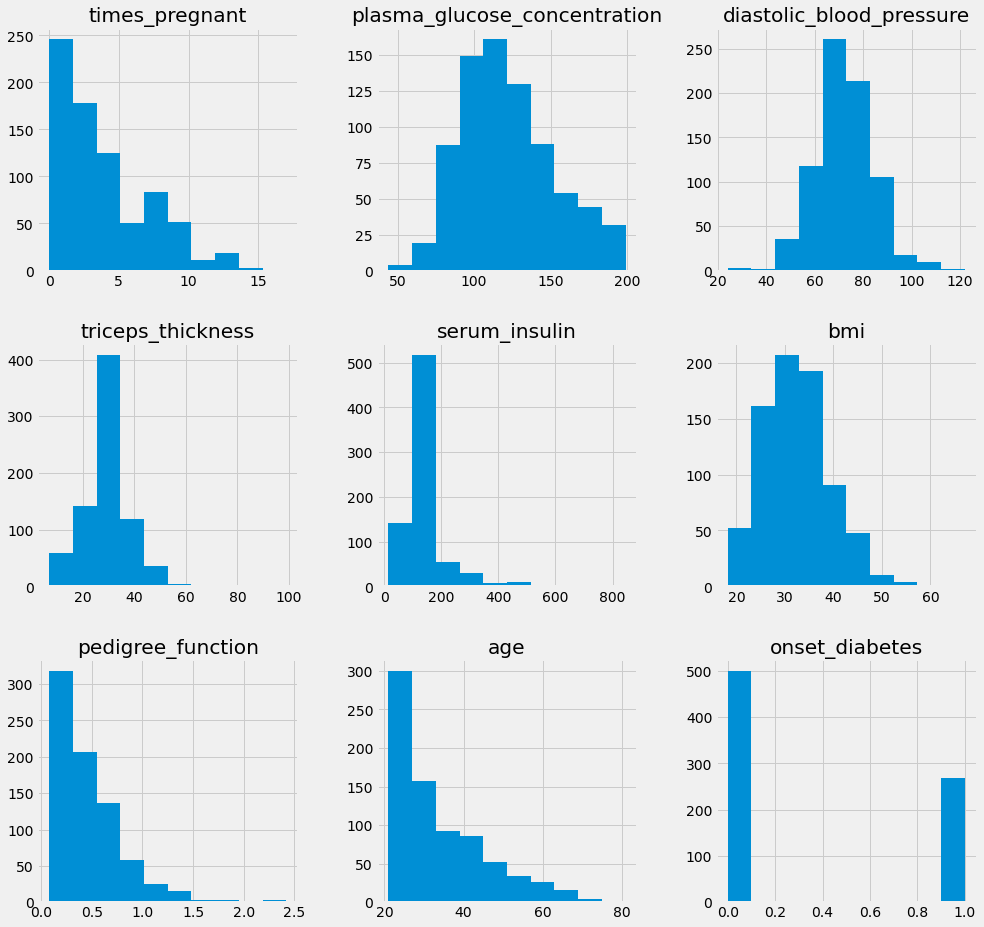

In [33]:
#觀察各個特徵的尺度

#填補遺漏值
impute = SimpleImputer(strategy='mean')

pima_imputed_mean = pd.DataFrame(impute.fit_transform(pima), columns=pima_column_names)

pima_imputed_mean.hist(figsize=(15,15))

各個特徵彼此之間的平均值、最小值、最大值和標準差差別都很大

In [34]:
#觀察數值
pima_imputed_mean.describe()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<AxesSubplot:title={'center':'times_pregnant'}>,
        <AxesSubplot:title={'center':'plasma_glucose_concentration'}>,
        <AxesSubplot:title={'center':'diastolic_blood_pressure'}>],
       [<AxesSubplot:title={'center':'triceps_thickness'}>,
        <AxesSubplot:title={'center':'serum_insulin'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'pedigree_function'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'onset_diabetes'}>]], dtype=object)

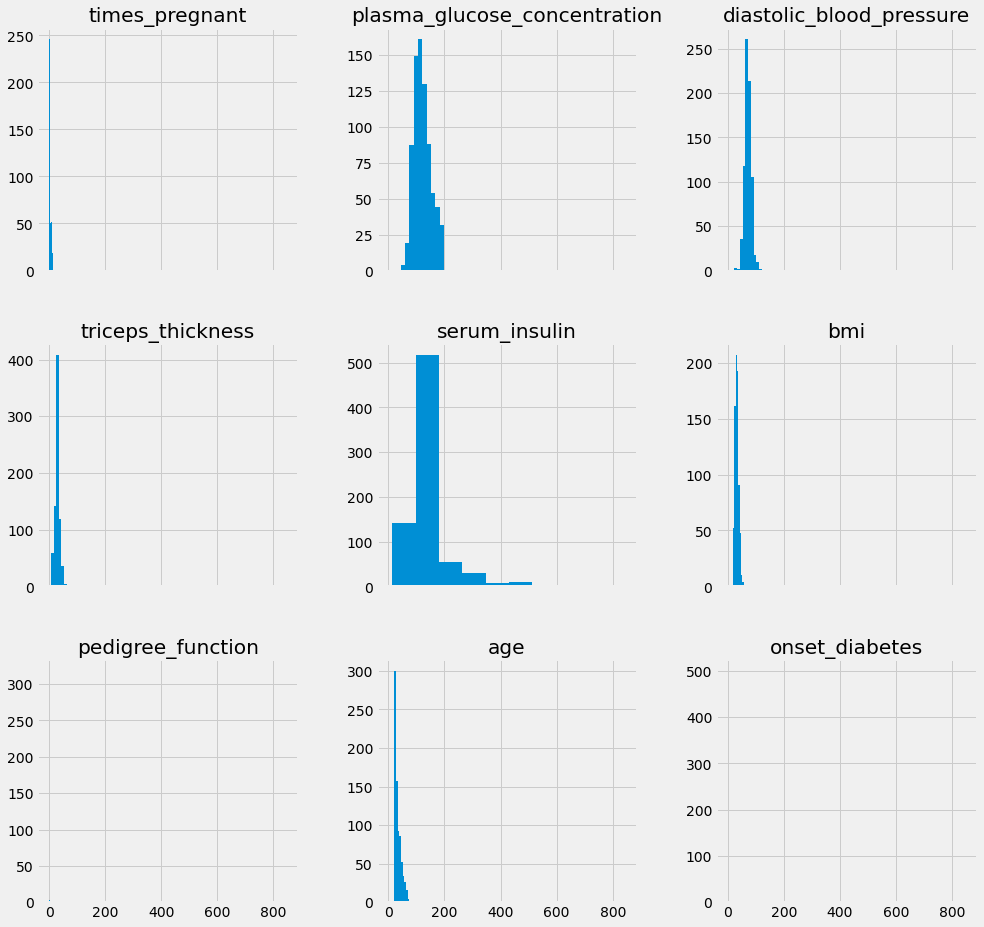

In [35]:
#在同一個比例下觀察不同資料，會發現差距很大
pima_imputed_mean.hist(figsize=(15,15), sharex=True)

## Z分數標準化(z-score standardization)
z = (x - μ) / σ (x:每一筆資料； μ:該行平均值； σ:該行標準差)

使平均值為0，標準差為1

In [36]:
#利用套件實現標準化
from sklearn.preprocessing import StandardScaler

#### 原始平均值與標準差

In [37]:
pima['plasma_glucose_concentration'].mean(), pima['plasma_glucose_concentration'].std()

(121.68676277850591, 30.435948867207657)

Text(0.5, 1.0, 'Distribution of plasma_glucose_concentration')

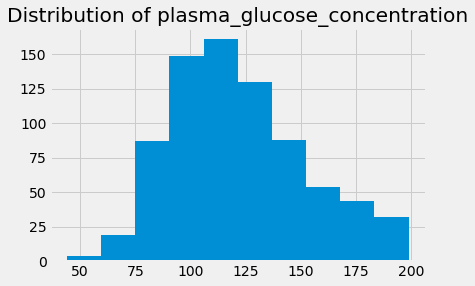

In [38]:
ax = pima['plasma_glucose_concentration'].hist()
ax.set_title('Distribution of plasma_glucose_concentration')

#### z-score標準化後的平均值與標準差

In [39]:
scaler = StandardScaler()

glucose_z_score_standardized = scaler.fit_transform(pima[['plasma_glucose_concentration']])

glucose_z_score_standardized.mean(), glucose_z_score_standardized.std()

(-3.561965537339044e-16, 1.0)

Text(0.5, 1.0, 'Distribution of plasma_glucose_concentration after Z Score Scaling')

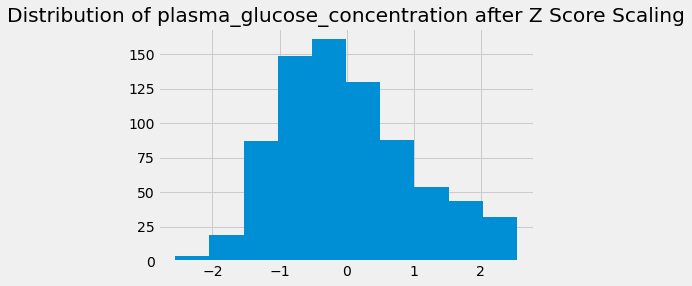

In [40]:
ax = pd.Series(glucose_z_score_standardized.reshape(-1,)).hist()
ax.set_title('Distribution of plasma_glucose_concentration after Z Score Scaling')

> z-score之後的資料「形狀」是沒有改變的，但X軸的數值變得緊密了

array([[<AxesSubplot:title={'center':'times_pregnant'}>,
        <AxesSubplot:title={'center':'plasma_glucose_concentration'}>,
        <AxesSubplot:title={'center':'diastolic_blood_pressure'}>],
       [<AxesSubplot:title={'center':'triceps_thickness'}>,
        <AxesSubplot:title={'center':'serum_insulin'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'pedigree_function'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'onset_diabetes'}>]], dtype=object)

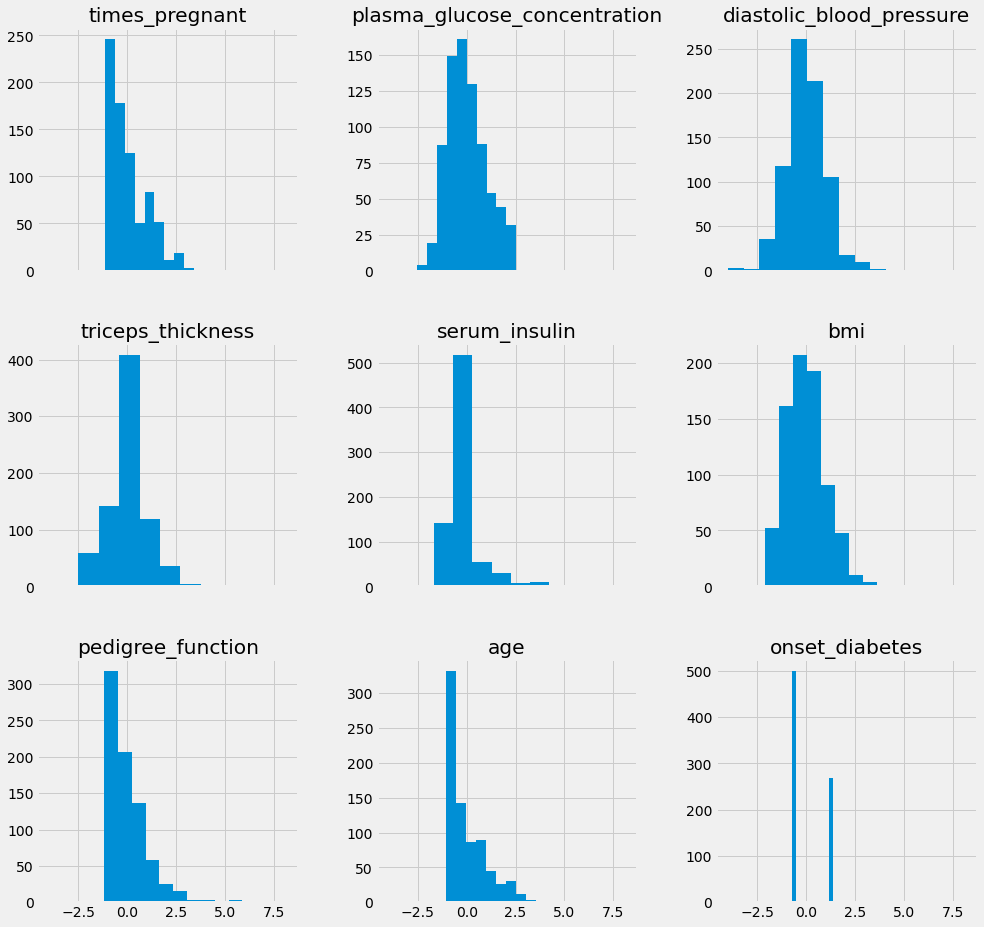

In [41]:
#再次觀察同一比例底下各個特徵的數值
scale = StandardScaler()

pima_imputed_mean_scaled = pd.DataFrame(scale.fit_transform(pima_imputed_mean), columns=pima_column_names)
pima_imputed_mean_scaled.hist(figsize=(15,15), sharex=True)

In [42]:
#將StandardScaler加入到pipeline裡面
knn_params = {'imputer__strategy':['mean', 'median'], 'classify__n_neighbors':[1,2,3,4,5,6,7]}

mean_impute_standardize = Pipeline([('imputer', SimpleImputer()), ('standarize', StandardScaler()), ('classify', knn)])
X = pima.drop('onset_diabetes',axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(mean_impute_standardize, knn_params)
grid.fit(X, y)

print(grid.best_score_, grid.best_params_)

0.7539173245055598 {'classify__n_neighbors': 7, 'imputer__strategy': 'mean'}


### 最小最大縮放(Min-max scaling)

m = (X - Xmin) / (Xmax - Xmin)

In [43]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()

pima_min_maxed = pd.DataFrame(min_max.fit_transform(pima_imputed), columns=pima_column_names)

pima_min_maxed.describe()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.501205,0.493930,0.240798,0.170130,0.291564,0.168179,0.204015,0.348958
std,0.198210,0.196361,0.123432,0.095554,0.102189,0.140596,0.141473,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.359677,0.408163,0.195652,0.129207,0.190184,0.070773,0.050000,0.000000
50%,0.176471,0.470968,0.491863,0.240798,0.170130,0.290389,0.125747,0.133333,0.000000
75%,0.352941,0.620968,0.571429,0.271739,0.170130,0.376278,0.234095,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


這邊的數值最小都是0，最大都是1

In [44]:
#最大最小縮放加入機器學習pipeline
knn_params = {'imputer__strategy':['mean', 'median'], 'classify__n_neighbors':[1,2,3,4,5,6,7]}

mean_impute_standardize = Pipeline([('imputer', SimpleImputer()), ('standarize', MinMaxScaler()), ('classify', knn)])
X = pima.drop('onset_diabetes',axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(mean_impute_standardize, knn_params)
grid.fit(X, y)

print(grid.best_score_, grid.best_params_)

0.7630336983278159 {'classify__n_neighbors': 7, 'imputer__strategy': 'median'}


### 列常態化(row normalization)

In [45]:
from sklearn.preprocessing import Normalizer

normalize = Normalizer()

pima_normalized = pd.DataFrame(normalize.fit_transform(pima_imputed), columns=pima_column_names)

#列常態化後矩陣的平均範束
np.sqrt((pima_normalized**2).sum(axis=1)).mean()

1.0

In [46]:
#列常態化加入機器學習pipeline
knn_params = {'imputer__strategy':['mean', 'median'], 'classify__n_neighbors':[1,2,3,4,5,6,7]}

mean_impute_standardize = Pipeline([('imputer', SimpleImputer()), ('normalize', Normalizer()), ('classify', knn)])
X = pima.drop('onset_diabetes',axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(mean_impute_standardize, knn_params)
grid.fit(X, y)

print(grid.best_score_, grid.best_params_)

0.7006111535523301 {'classify__n_neighbors': 7, 'imputer__strategy': 'median'}
